In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


(-0.5, 63.5, 63.5, -0.5)

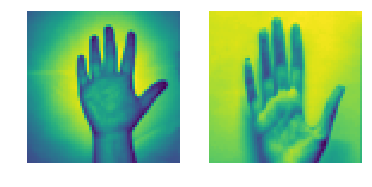

In [2]:
x_l = np.load('datasets/Sign-language-digits-dataset/X.npy')
y_l = np.load('datasets/Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[1855].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[2061].reshape(img_size, img_size))
plt.axis('off')

In [3]:
X = np.concatenate([x_l[204: 407], # 0 sign
                    x_l[822: 1025], # 1 sign
                    x_l[1649: 1852], # 2 sign
                    x_l[1443: 1646], # 3 sign
                    x_l[1236: 1439], # 4 sign
                    x_l[1855: 2058], # 5 sign
                    x_l[615: 818], # 6 sign
                    x_l[409: 612], # 7 sign
                    x_l[1028: 1231], # 8 sign
                    x_l[0: 203], # 9 sign
                    ], axis = 0)

z = np.zeros(203)
o = np.ones(203)
two = np.empty(203); two.fill(2)
three = np.empty(203); three.fill(3)
four = np.empty(203); four.fill(4)
five = np.empty(203); five.fill(5)
six = np.empty(203); six.fill(6)
seven = np.empty(203); seven.fill(7)
eight = np.empty(203); eight.fill(8)
nine = np.empty(203); nine.fill(9)
Y = np.concatenate([z, o, two, three, four, five, six, seven, eight, nine], axis = 0)
Y = Y.reshape(X.shape[0], 1)

Y = to_categorical(Y, num_classes = 10)

print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (2030, 64, 64)
Y shape:  (2030, 10)


0 = 204-408 = 205 <br>
1 = 822-1026 = 205 <br>
2 = 1649-1854 = 206 <br>
3 = 1443-1648 = 205 <br>
4 = 1236-1442 = 206 <br>
5 = 1855-2061 = 206 <br>
6 = 615-821 = 206 <br>
7 = 409-614 = 205 <br>
8 = 1028-1235 = 207 <br>
9 = 0-203 = 203 <br>

0 = 204-406 = 203 <br>
1 = 822-1024 = 203 <br>
2 = 1649-1851 = 203 <br>
3 = 1443-1646 = 203 <br>
4 = 1236-1439 = 203 <br>
5 = 1855-2058 = 203 <br>
6 = 615-818 = 203 <br>
7 = 409-612 = 203 <br>
8 = 1028-1231 = 203 <br>
9 = 0-203 = 203

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 42)

In [5]:
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [6]:
print(x_train.shape)
print(x_test.shape)

(1725, 4096)
(305, 4096)


In [7]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)

In [8]:
# print("test accuracy: {} ".format(logreg.fit(x_train, Y_train).score(x_test, Y_test)))
# print("train accuracy: {} ".format(logreg.fit(x_train, Y_train).score(x_train, Y_train)))

In [9]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [14]:
model = Sequential()
model.add(Dense(units = 64, activation = 'relu', input_dim = (x_train.shape[1])))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs = 100, batch_size =  32)
# accuracies = cross_val_score(estimator = model, X = x_train, y = Y_train, cv = 3)
# print(accuracies.mean())

Instructions for updating:
Use tf.cast instead.
Train on 1725 samples, validate on 305 samples
Epoch 1/100
1725/1725 [==============================] - 1s 378us/step - loss: 0.1155 - acc: 0.0968 - val_loss: 0.0968 - val_acc: 0.1246
Epoch 2/100
1725/1725 [==============================] - 0s 105us/step - loss: 0.0959 - acc: 0.1333 - val_loss: 0.0967 - val_acc: 0.1902
Epoch 3/100
1725/1725 [==============================] - 0s 102us/step - loss: 0.0938 - acc: 0.2046 - val_loss: 0.0944 - val_acc: 0.1738
Epoch 4/100
1725/1725 [==============================] - 0s 105us/step - loss: 0.0913 - acc: 0.2278 - val_loss: 0.0904 - val_acc: 0.2492
Epoch 5/100
1725/1725 [==============================] - 0s 104us/step - loss: 0.0888 - acc: 0.2499 - val_loss: 0.0895 - val_acc: 0.2131
Epoch 6/100
1725/1725 [==============================] - 0s 127us/step - loss: 0.0874 - acc: 0.2597 - val_loss: 0.0889 - val_acc: 0.2590
Epoch 7/100
1725/1725 [==============================] - 0s 148us/step - loss: 0.08

1725/1725 [==============================] - 0s 94us/step - loss: 0.0252 - acc: 0.8533 - val_loss: 0.0353 - val_acc: 0.7967
Epoch 59/100
1725/1725 [==============================] - 0s 92us/step - loss: 0.0274 - acc: 0.8400 - val_loss: 0.0354 - val_acc: 0.7672
Epoch 60/100
1725/1725 [==============================] - 0s 95us/step - loss: 0.0279 - acc: 0.8388 - val_loss: 0.0407 - val_acc: 0.7377
Epoch 61/100
1725/1725 [==============================] - 0s 94us/step - loss: 0.0370 - acc: 0.7548 - val_loss: 0.0354 - val_acc: 0.7738
Epoch 62/100
1725/1725 [==============================] - 0s 92us/step - loss: 0.0270 - acc: 0.8493 - val_loss: 0.0318 - val_acc: 0.8000
Epoch 63/100
1725/1725 [==============================] - 0s 94us/step - loss: 0.0266 - acc: 0.8365 - val_loss: 0.0320 - val_acc: 0.7902
Epoch 64/100
1725/1725 [==============================] - 0s 95us/step - loss: 0.0265 - acc: 0.8406 - val_loss: 0.0376 - val_acc: 0.7672
Epoch 65/100
1725/1725 [==============================